In [4]:
using Pkg
Pkg.add("WebIO")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [5]:
using WebIO
using IJulia
include("GA.jl")
include("plottingUtils.jl")
include("roadNetwork.jl")

In [6]:
boundary1(x) = 0
boundary2(x) = 13
# boundary1(x) = sin(x+12)+4
# boundary2(x) = sin(x+4)+12
o1 = Circle(1,Point(5,10))
o2 = Circle(1.2,Point(10,7))
o3 = Circle(0.8,Point(7,6))
o4 = Circle(0.8,Point(12,8))
# o2 = Rectangle(3,2,Point(10,7))
start_point = Point(0,10)
goal_point = Point(19,5.2)

road = Road(boundary1,boundary2,[o1,o2,o3,o4])
# road = Road(boundary1,boundary2,[])

Road(boundary1, boundary2, Obstacle[Circle(1, Point(5, 10)), Circle(1.2, Point(10, 7)), Circle(0.8, Point(7, 6)), Circle(0.8, Point(12, 8))])

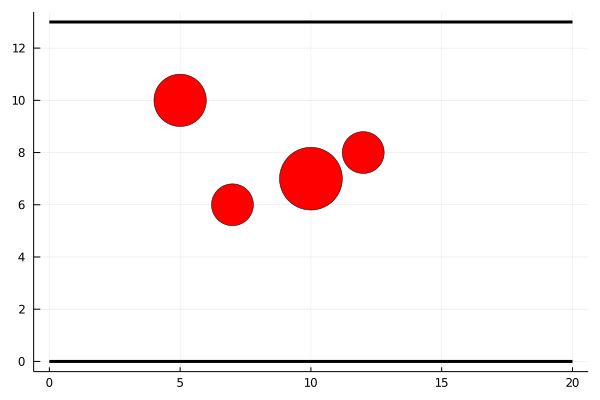

In [7]:
gr()

draw_road(road,0,20)

In [8]:
circle = Circle(1,Point(5,10))
test_curve = BezierCurve([Point(2,9),Point(6,11)])
test_curve = BezierCurve([Point(0, 10), Point(9.792786584297819, 12.404595735445575), Point(19, 9)])

3-element Array{Point,1}:
 Point(0, 10)
 Point(9.792786584297819, 12.404595735445575)
 Point(19, 9)

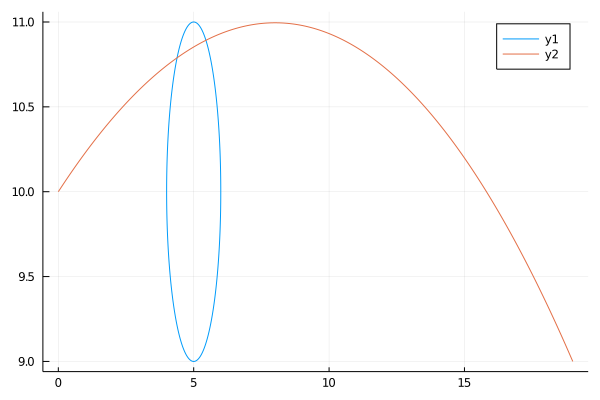

In [9]:
plt = plot(get_circle(circle))
plot!(plt,get_curve(test_curve))

In [10]:
curve_values = get_curve(test_curve)
i = findall(x -> x==4,curve_values[1])
@show i
curve_values[2][i]

i = Int64[]


Any[]

In [8]:
circle_values = get_circle(circle)
is = findall(x -> round(x,digits=2) == 4.00,circle_values[1])
# filter(x -> x<4.1,circle_values[1])

LoadError: UndefVarError: circle not defined

In [9]:
circ_intersects = []
for i in is
    if round(circle_values[2][i],digits=1) == curve_values[2][251]
        append!(circ_intersects,[i])
    end
end
circ_intersects

LoadError: UndefVarError: is not defined

In [10]:
intersects = []
for i in 1:length(curve_values[1])
    x = curve_values[1][i]
    y = curve_values[2][i]
    potential_intersect_circle_is = findall(cx -> round(cx,digits=1)==round(x,digits=1),circle_values[1])
    for j in potential_intersect_circle_is
        if round(y,digits=1) == round(circle_values[2][j],digits=1)
            append!(intersects,[(x,y)])
        end
    end
end
@show intersects

infeasbile_d = √((intersects[1][1]-intersects[end][1])^2 + (intersects[1][2] - intersects[end][2])^2)


LoadError: UndefVarError: curve_values not defined

In [23]:
include("GA.jl")
include("roadNetwork.jl")
include("plottingUtils.jl")
P = GA(start_point,goal_point,road,10,15);

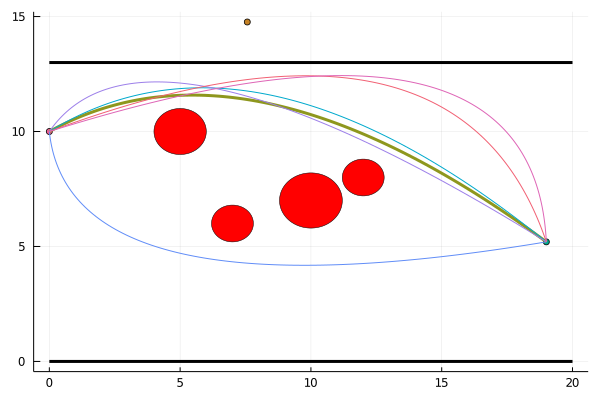

In [24]:
plotGeneration!(draw_road(road,0,20),P,road)

# map(i->isFeasible(road,i),P)

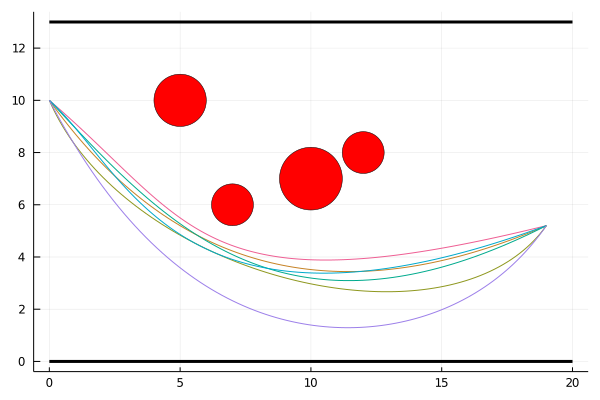

In [113]:
include("GA.jl")
plotGeneration!(draw_road(road,0,20),filter(i -> infeasible_distance(road,i.phenotype.genotype)==0,P))
# feasibilityCheck(road,P[1])

This is what the generated routes look like after all infeasible and uncomfortably close routes are filtered out 

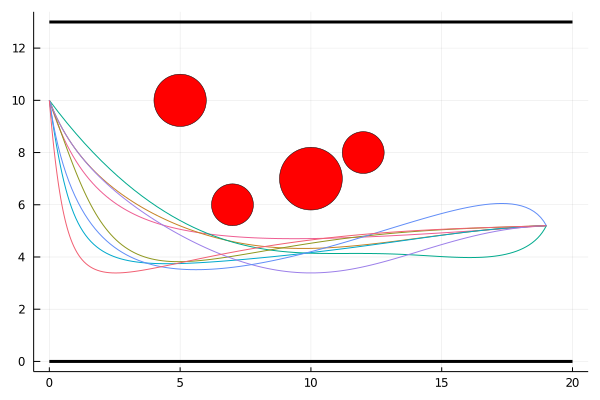

In [86]:
plotGeneration!(draw_road(road,0,20),filter(i->high_proximity_distance(road,i.phenotype.genotype)==0,filter(i -> infeasible_distance(road,i.phenotype.genotype)==0,P)))


In [121]:
best = P[1].fitness

21.80898561293353

In [122]:
optimal = √((start_point.x - goal_point.x)^2 + (start_point.y - goal_point.y)^2)

19.596938536414303

In [123]:
(best/optimal-1)*100

11.287717581033817

In [104]:
filter(i-> high_proximity_distance(road,i.phenotype.genotype)==0 ∘ i->infeasible_distance(road,i.phenotype.genotype)==0,P)

Individual[]

In [15]:
function plotObstacles(road)
    plt = plot()
    for o in road.obstacles
        plot!(plt,get_circle(o), seriestype=[:shape],legend=false )
    end
    plt
end

plotObstacles (generic function with 1 method)

In [55]:
include("plottingUtils.jl")
# plt =plotObstacles(road)
# plotGeneration!(plt,P)

plot_control_points! (generic function with 1 method)

In [106]:
include("roadNetwork.jl")
include("utils.jl")

c = BezierCircle()
# x = BezierCurve([Point(0,1)])


4-element Array{Point,1}:
 Point(0, 1)
 Point(0.0, 1.7698003589195008)
 Point(0.16666666666666685, 1.250925583244189)
 Point(-0.4999999999999998, 0.8660254037844387)

In [61]:
circ = Circle(1,Point(0,0))

Circle(1, Point(0, 0))

In [67]:
circ(π)
# c(0.5)

(-1.0, 1.2246467991473532e-16)

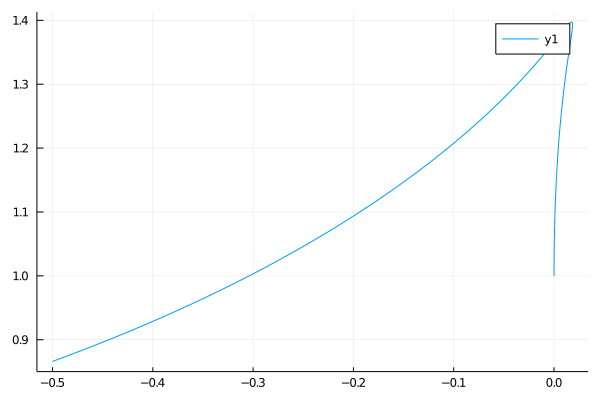

In [107]:
plot_curve(c,100)

In [15]:
c = (4/3)*(√(2)-1)
c1 = BezierCurve([Point(0,1),Point(c,1),Point(1,c),Point(1,0)])
c2 = BezierCurve([Point(1,0),Point(1,-c),Point(c,-1),Point(0,-1)])
c3 = BezierCurve([Point(0,-1),Point(-c,-1),Point(-1,-c),Point(-1,0)])
c4 = BezierCurve([Point(-1,0),Point(-1,c),Point(-c,1),Point(0,1)])

4-element Array{Point,1}:
 Point(-1, 0)
 Point(-1, 0.5522847498307935)
 Point(-0.5522847498307935, 1)
 Point(0, 1)

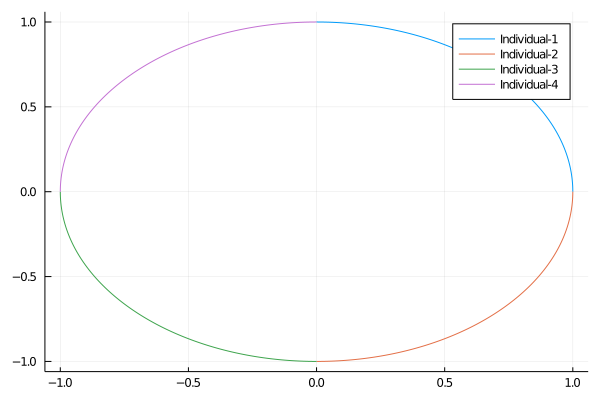

In [16]:
plt = plot()
plot_curve!(plt,1,c1,100)
plot_curve!(plt,2,c2,100)
plot_curve!(plt,3,c3,100)
plot_curve!(plt,4,c4,100)


zs = Float64[]


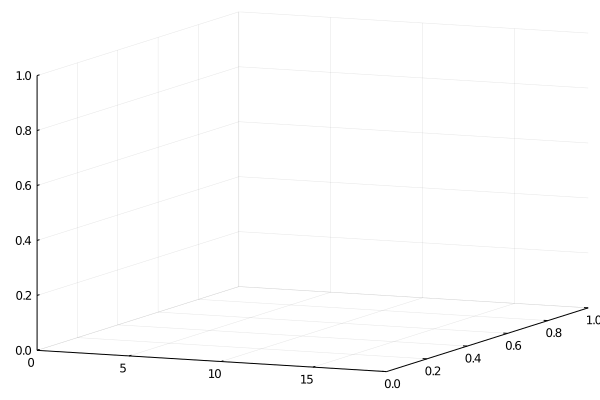

invalid number of points
invalid number of points
invalid number of points


In [166]:
include("FitnessLandscape.jl")
fitness_landscape(road,Fitness,(start_point.x,goal_point.x),(start_point.y,goal_point.y))

In [167]:
xs = Array(range(0,4,step=0.2))
ys = Array(range(2,5,step=0.2))


16-element Array{Float64,1}:
 2.0
 2.4000000000000004
 2.8
 3.2
 3.5999999999999996
 4.0
 4.4
 4.8
 5.2
 5.6
 6.0
 6.4
 6.800000000000001
 7.199999999999999
 7.6
 8.0